# Custom velocity distribution

All particle species in ZPIC are initialized using an initial fluid (generalized) velocity, $\mathbf{u}_{fl}$, and a thermal distribution of width $\mathbf{u}_{fl}$ (see the [Thermal Distribution](Thermal&#32Distribution.ipynb) notebook for deails).

Different (custom) velocity distributions can be specified by accessing the particle data and overwriting the velocity data. The procedure is simple:

1. Create the particle species the usual way. You may ommit the `uth` and `ufl` parameters, since you will be changing the velocity later.
2. Create the simulation object. This will initialize all the data structures. If you specified `uth` and/or `ufl` this will also set the velocity values, otherwise they will be set to 0
3. Before starting the simulation set the required velocities using the `species.particles['ux']` (and `uy`/`uz`) properties
4. Run the simulation as usual

## Oscillation in a thermal plasma

To illustrate this procedure we will initialize a plasma that has a small temperature and a sinusoidal fluid velocity profile (with respect to position). We use the standard initialization to create the temperature profile and then add the oscillation:

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1ds as zpic
import numpy as np

# Create the particle species with temperature uth
ppc = 1000
uth = [0.01,0.01,0.01]
electrons = zpic.Species( "electrons", -1.0, 1000, uth = uth )

# Create the simulation object
lx = 12.8
sim = zpic.Simulation( 128, box = lx, dt = 0.05, species = electrons )

# Simple function to convert particle positions
pos = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx
x = pos(electrons)

# Add fluid oscillation
electrons.particles['ux'] += 0.1 * np.sin( 4 * np.pi * x / lx )

The initial velocity distribution can be readily visualized

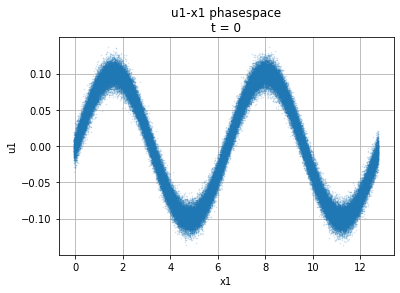

In [2]:
import matplotlib.pyplot as plt

plt.plot(pos(electrons),  electrons.particles['ux'],  '.', ms=1,alpha=0.2, label = "Left")
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()

The simulation can be run the usual way, using the `sim.run()` method:

In [3]:
sim.run(10)


Running simulation up to t = 10 ...
n = 201, t = 10.05
Done.


We can see that the particle distribution that we initialized evolves appropriately:

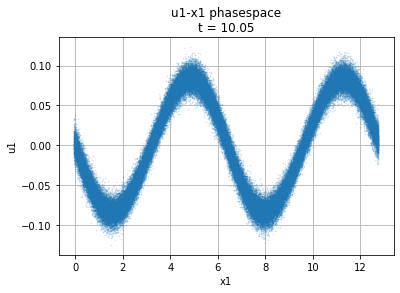

In [4]:
plt.plot(pos(electrons),  electrons.particles['ux'],  '.', ms=1,alpha=0.2, label = "Left")
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()